<a href="https://colab.research.google.com/github/Suhail727/Data-Science-Projects/blob/master/Pima%20Indians%20Diabetes%20Database/Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# !pip install pandas --upgrade
# !pip install matplotlib --upgrade
# !pip install seaborn --upgrade
# !pip install numpy --upgrade
# !pip install itertools --upgrade
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

diab = pd.read_csv('diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
# Find Null values
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values found.



---

 **Begin Exploratory Data Analysis**


---



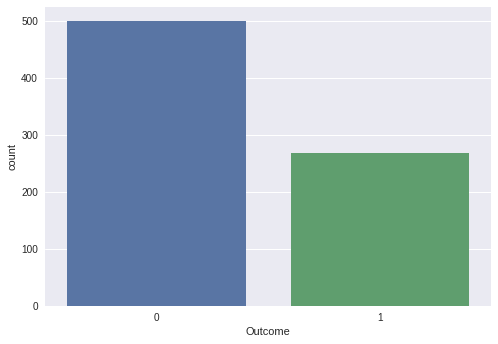

In [62]:
# Check if data is balanced
sns.countplot(x='Outcome',data=diab)

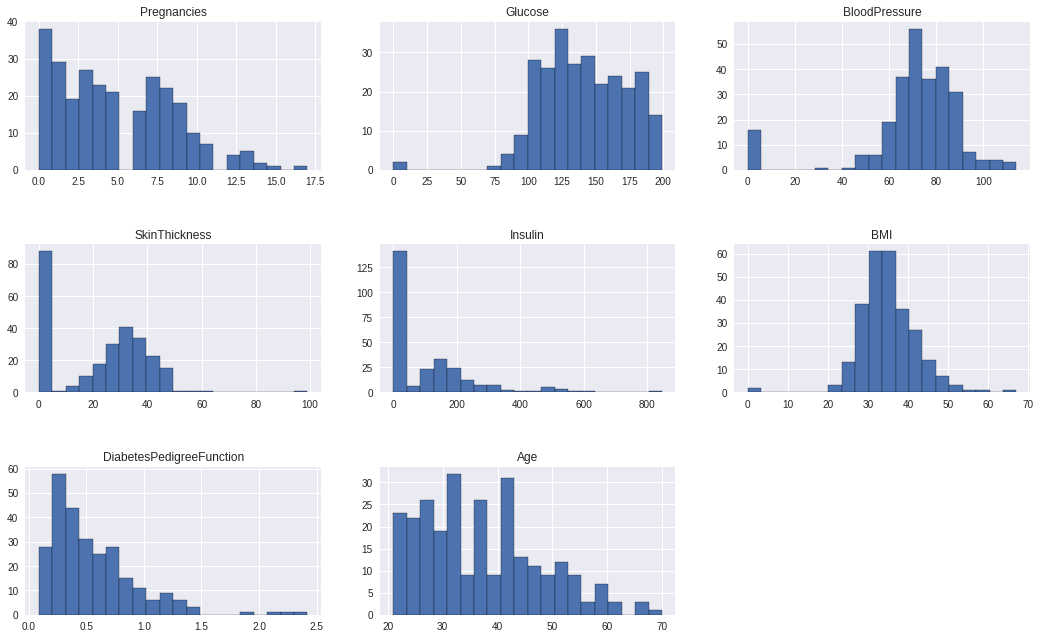

In [63]:
diab1=diab[diab['Outcome']==1]
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

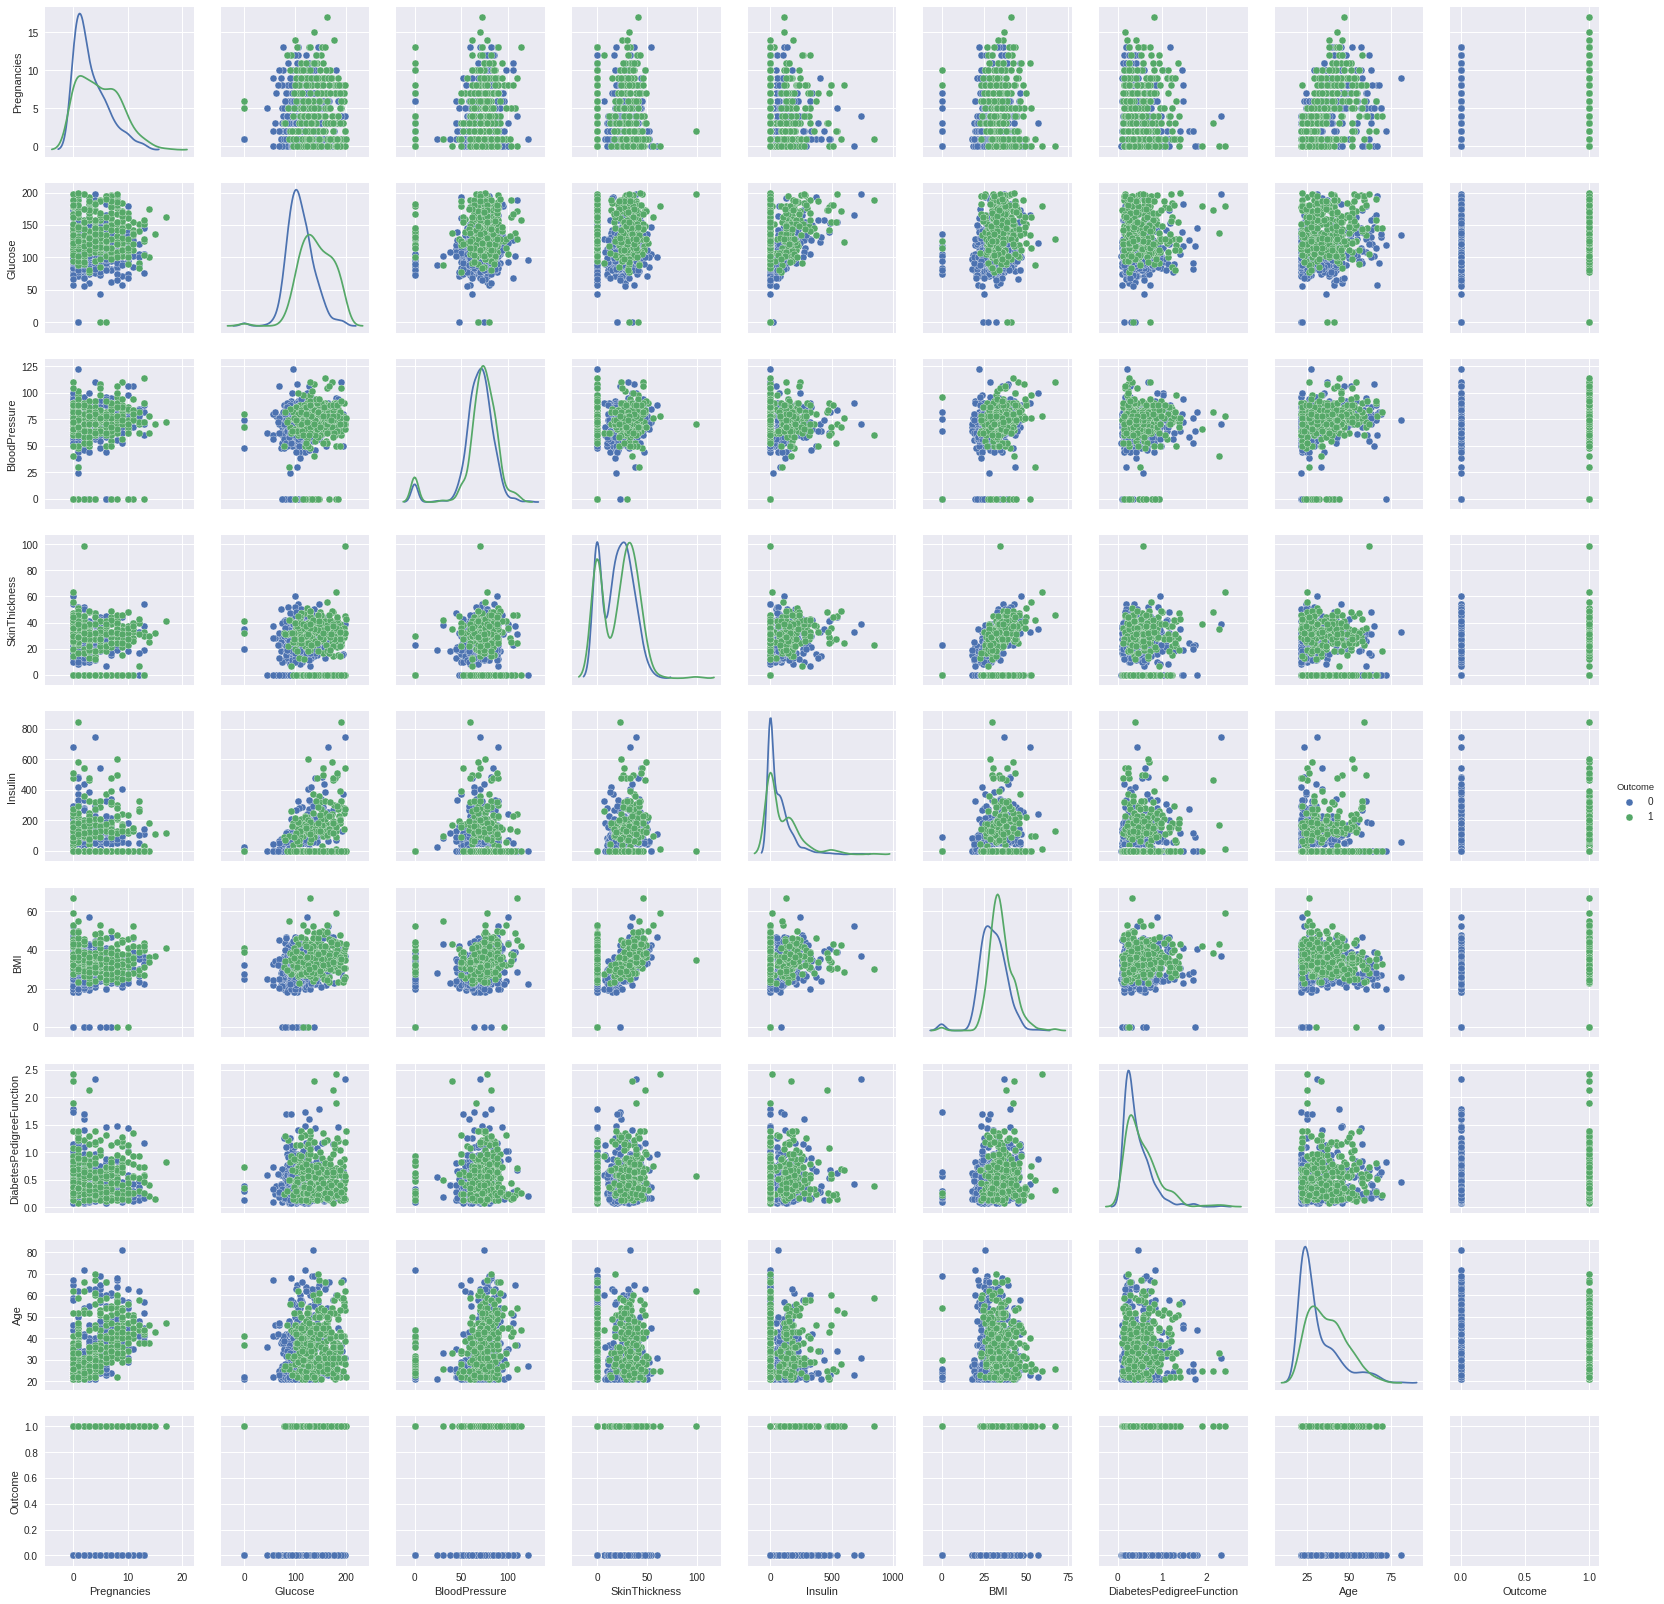

In [64]:
# Have a look at the distribution of data in the dataset
sns.pairplot(data=diab,hue='Outcome',diag_kind='kde')

*   The diagonal shows the distribution of the the dataset with the kernel density plots.
*   The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances


**Building Models**


---


Split into Train and Test, also stratify the data (balance out 1 and 0 to get accurate results)

In [65]:
outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
train_Y=train['Outcome']
test_X=test[test.columns[:8]]
test_Y=test['Outcome']

train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72
706,10,115,0,0,0,0.0,0.261,30
606,1,181,78,42,293,40.0,1.258,22
118,4,97,60,23,0,28.2,0.443,22


---
---

Support Vector Machine

----
----

In [66]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i,gamma='auto')
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.6510416666666666
Accuracy for SVM kernel= linear is 0.7708333333333334


---
---

Logistic Regression

----
----

In [67]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


---
---

Decision Tree

----
----

In [68]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.7552083333333334


---
---

K-Nearest Neighbours

----
----

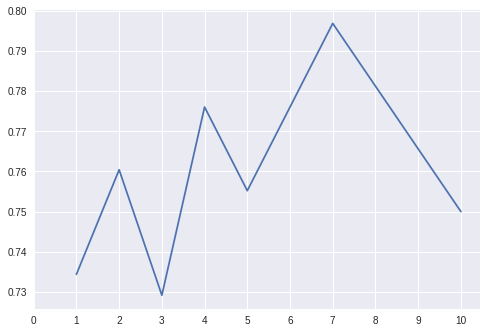

Accuracies for different values of n are: [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75      ]


In [69]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [70]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear',gamma='auto'),svm.SVC(kernel='rbf',gamma='auto'),LogisticRegression(solver='lbfgs', max_iter=1000),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.651042
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.755208


**Feature Extraction/ Selection:**

---


We can choose important features in 2 ways:

1.   Correlation matrix--> selecting only the uncorrelated features.
2.   RandomForestClassifier--> It gives the importance of the features



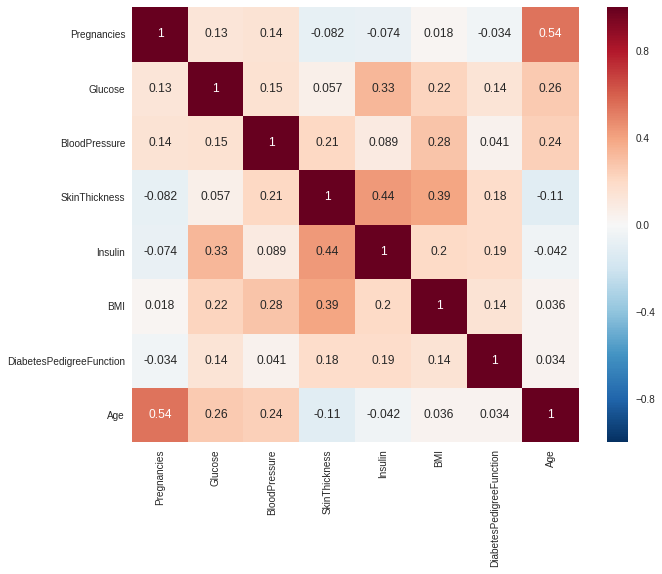

In [71]:
# Correlation Matrix
sns.heatmap(data = diab[diab.columns[:8]].corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

None of the attributes seem to be highly correlated

In [72]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

Glucose, BMI, Age, DiabetesPedigreeFunction seem to be the most important features



---

**Standardisation**




In [73]:
diab2=diab[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler #Standardisation
features=diab2[diab2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=diab2['Outcome']
outcome=x['Outcome']

train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
train_Y1=train1['Outcome']
test_X1=test1[test1.columns[:4]]
test_Y1=test1['Outcome']

train_X1.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction
432,-1.279882,-0.252897,-0.956462,0.166480
453,-0.059293,-1.572857,3.297926,1.087616
706,-0.184482,-4.060474,-0.275760,-0.636871
606,1.881130,1.016296,-0.956462,2.374187
118,-0.747831,-0.481351,-0.956462,-0.087210


In [74]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear',gamma='auto'),svm.SVC(kernel='rbf',gamma='auto'),LogisticRegression(solver='lbfgs', max_iter=1000),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
    
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']  
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.781250,0.770833,0.010417
Radial Svm,0.770833,0.651042,0.119792
Logistic Regression,0.776042,0.781250,-0.005208
KNN,0.729167,0.729167,0.000000
Decision Tree,0.723958,0.755208,-0.031250


The accuracy has increased significantly for Radial SVM


---


**K- Fold Cross Validation**

In [75]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear',gamma='auto'),svm.SVC(kernel='rbf',gamma='auto'),LogisticRegression(solver='lbfgs', max_iter=1000),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:4]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(xyz,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.774727
Radial Svm,0.769532
Logistic Regression,0.772112
KNN,0.738397
Decision Tree,0.687406


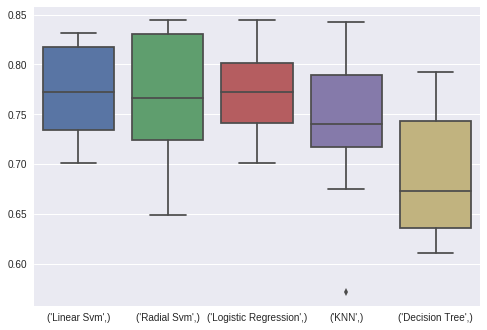

In [76]:
box=pd.DataFrame(accuracy,index=[classifiers])
sns.boxplot(box.T)
plt.show()

The boxplot shows that SVM and Logistic Regression performs best while Decision Tree performs the worst


---

**Ensembling**

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. The models used to create such ensemble models are called ‘base models’.

We will do ensembling with the Voting Ensemble. Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

We will be using weighted Voting Classifier. We will assign to the classifiers according to their accuracies. So the classifier with single accuracy will be assigned the highest weight and so on.

In our case, we will use the Top 3 classifiers i.e Linaer SVM, Radial(rbf) SVM and Logistic Regression classifiers.

In [0]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

Linear and Radial SVM

In [78]:
ensemble_lin_rbf=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Radial_svm', radial_svm)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear and Radial SVM is:',ensemble_lin_rbf.score(test_X1,test_Y1))


The accuracy for Linear and Radial SVM is: 0.7760416666666666


Linear SVM with Logistic Regression

In [79]:
ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))

The accuracy for Linear SVM and Logistic Regression is: 0.78125


Logistic Regression with Radial SVM

In [80]:
ensemble_rad_lr=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                       voting='soft', weights=[1,2]).fit(train_X1,train_Y1)
print('The accuracy for Radial SVM and Logistic Regression is:',ensemble_rad_lr.score(test_X1,test_Y1))

The accuracy for Radial SVM and Logistic Regression is: 0.78125


All 3 classifiers combined

In [81]:
ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(train_X1,train_Y1)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(test_X1,test_Y1))

The ensembled model with all the 3 classifiers is: 0.7760416666666666


Maximum Accuracy which we could get by using ensemble models is 78.125%.